In [195]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

random.seed(42)

In [196]:
#Leitura do dataset
data_path = ".\dermatology.data"
data = pd.read_csv(data_path, header=None)

#Operações de pré-processamento
data = data.replace("?", float("NaN"))
data = data.dropna(axis='rows')

data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [197]:
#Divisão em recursos (X) e rótulos (y)

data = data.to_numpy()
y = data[:, -1]
X = data[:, 0:-1]

#Modificação de dados categóricos para numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinamento do modelo de classificação
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#Previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliação da acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.9444444444444444


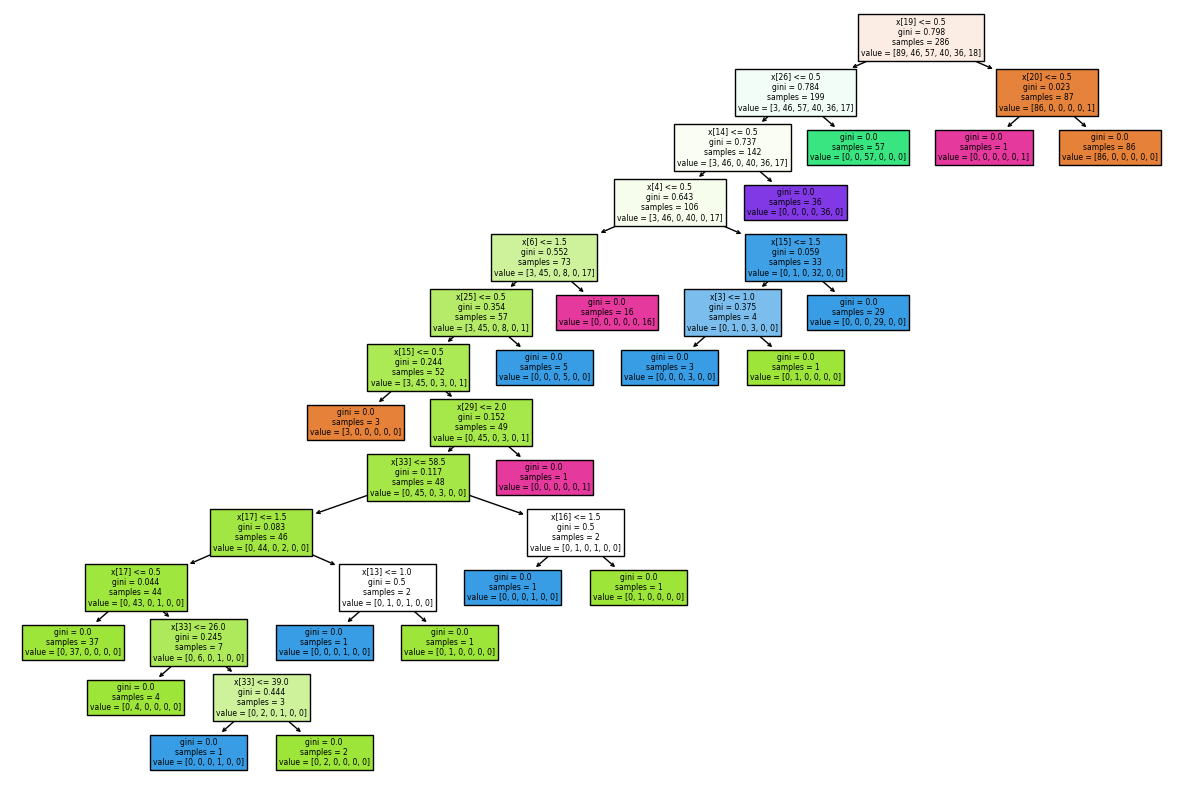

In [199]:
#Gráfico em árvore(Opcional)
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(X_train,y_train),filled=True)
plt.show()